#  GRAPE calculation of control fields for cnot implementation

control-grape-cnot-explained

Robert Johansson (robert@riken.jp)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
from qutip import *
from qutip.control import *

In [3]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

"""
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [4]:
U = cnot()
R = 500
H_ops = [tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
         tensor(sigmax(), sigmax()) +
         tensor(sigmay(), sigmay()) +
         tensor(sigmaz(), sigmaz())]



$U = CNOT $   
$H_{ops} = [\sigma_{x} \otimes Q, \sigma_{y} \otimes Q,  \sigma_{z} \otimes Q, Q \otimes \sigma_{x}, Q \otimes \sigma_{y}, Q \otimes \sigma_{z}, \sigma_{x} \otimes \sigma_{x}, \sigma_{y} \otimes \sigma_{y}, \sigma_{z} \otimes \sigma_{z}, ] $


In [ ]:
H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$',
            r'$u_{2x}$', r'$u_{1y}$', r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

In [5]:
H_labels

['$u_{1x}$',
 '$u_{1y}$',
 '$u_{1z}$',
 '$u_{2x}$',
 '$u_{1y}$',
 '$u_{2z}$',
 '$u_{xx}$',
 '$u_{yy}$',
 '$u_{zz}$']

In [8]:
H0 = 0 * np.pi * (tensor(sigmax(), identity(2)) + tensor(identity(2), sigmax()))

c_ops = []

$H_{0} = 0 * \pi (\sigma_{x} \otimes Q + Q \otimes \sigma_{x})$

    This is the analytical result in the absence of single-qubit tunnelling.
$g = \pi/(4 * T)$   
$H = g * (\sigma_{x} \otimes \sigma_{x}) + (\sigma_{y} \otimes \sigma_{y})) $

# GRAPE

In [7]:
from qutip.control.grape import plot_grape_control_fields, _overlap 
from qutip.control.grape import grape_unitary_adaptive, cy_grape_unitary

In [8]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [11]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [ ]:
u0

In [12]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:  91.13s. Est. time left: 00:00:13:40
20.0%. Run time: 180.72s. Est. time left: 00:00:12:02
30.0%. Run time: 270.12s. Est. time left: 00:00:10:30
40.0%. Run time: 359.69s. Est. time left: 00:00:08:59
50.0%. Run time: 449.85s. Est. time left: 00:00:07:29
60.0%. Run time: 563.55s. Est. time left: 00:00:06:15
70.0%. Run time: 664.03s. Est. time left: 00:00:04:44
80.0%. Run time: 758.70s. Est. time left: 00:00:03:09
90.0%. Run time: 854.48s. Est. time left: 00:00:01:34
Total run time: 946.78s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

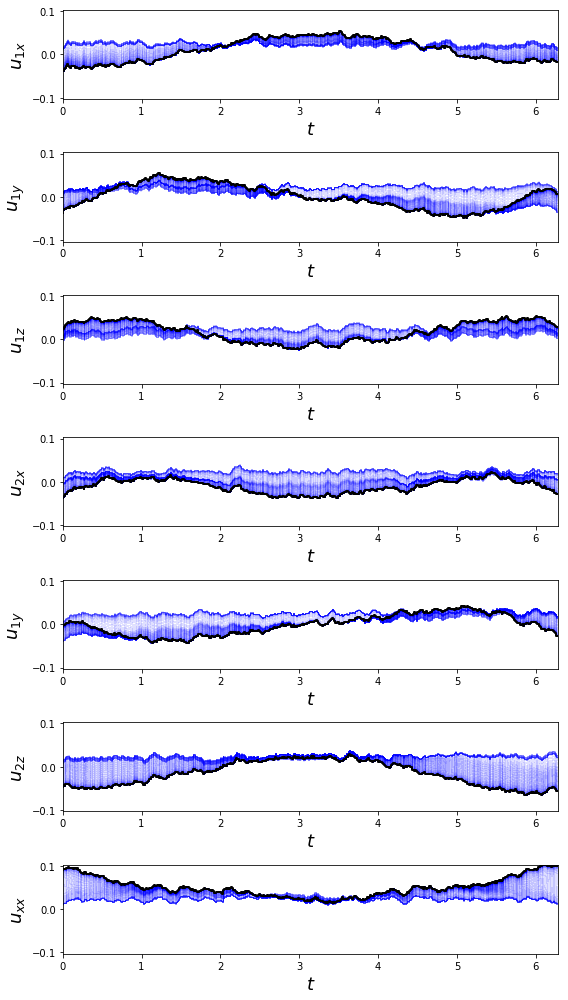

In [13]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [14]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [15]:
result.U_f

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-7.07106781e-01-7.07106781e-01j  1.33845216e-16+1.44074154e-16j
  -1.46350353e-17+1.91155854e-16j  6.70141449e-17+2.63253647e-16j]
 [-9.69833405e-16-4.75722947e-16j -7.07106781e-01-7.07106781e-01j
   1.13927964e-15-6.02057466e-16j -2.87840218e-16+4.12799813e-16j]
 [-2.31966434e-16-1.26813842e-16j  7.34574077e-16-4.06549345e-16j
  -5.50937334e-16-8.04478012e-16j -7.07106781e-01-7.07106781e-01j]
 [-6.41884532e-16-1.29388518e-16j  1.86591194e-16+1.03779832e-15j
  -7.07106781e-01-7.07106781e-01j  4.48426019e-16-7.69512492e-17j]]

In [16]:
result.U_f/result.U_f[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [17]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f)) ** 2

(-0.7071067811865472, 1.0000000000000009)

## Test numerical integration of GRAPE pulse

In [18]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.03119725-0.12136359j  0.18498339-0.14710511j  0.13521833-0.15183665j
  -0.04801585-0.9406357j ]
 [ 0.22178016+0.05892222j  0.60517525-0.72745258j  0.01754979+0.09999445j
   0.01493427+0.20343856j]
 [ 0.22561563+0.01157469j  0.04510042+0.06569703j  0.53208266-0.78851111j
  -0.01133652+0.19396523j]
 [ 0.89249528+0.28992262j -0.1671607 +0.12010017j -0.18340971+0.09926685j
  -0.09564966-0.1561691j ]]

In [19]:
U_f_numerical / U_f_numerical[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j          0.76945178+1.72200052j  0.9048942 +1.34676748j
   7.36555975+1.49772539j]
 [-0.89603826+1.59707067j  4.42012062+6.12268327j -0.80772364-0.06302516j
  -1.60204548-0.28876154j]
 [-0.53771001+1.72078426j -0.59737633+0.21805489j  5.03726046+5.67906152j
  -1.47663185-0.4729867j ]
 [-4.01400339+6.32207247j -0.59614076-1.53059616j -0.40283698-1.61479324j
   1.39706432-0.42900102j]]

In [20]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

(0.03117497972816726, 0.02828065185043734)

# Process tomography

## Ideal cnot gate

In [21]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

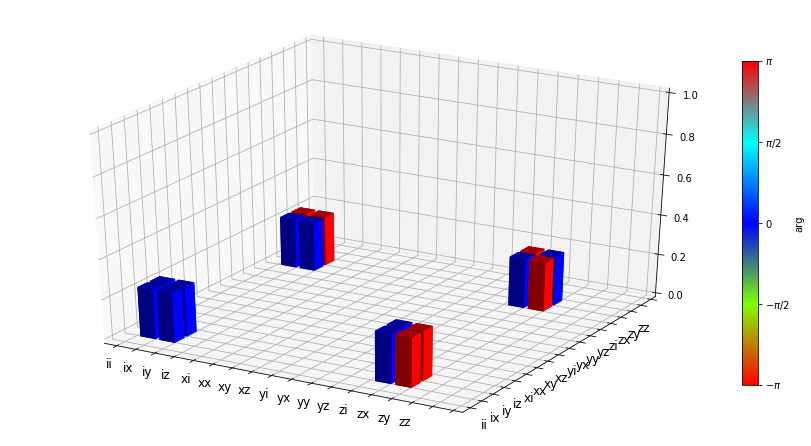

In [22]:
fig = plt.figure(figsize=(12,6))

U_i_s = to_super(U)

chi = qpt(U_i_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## cnot gate calculated using GRAPE

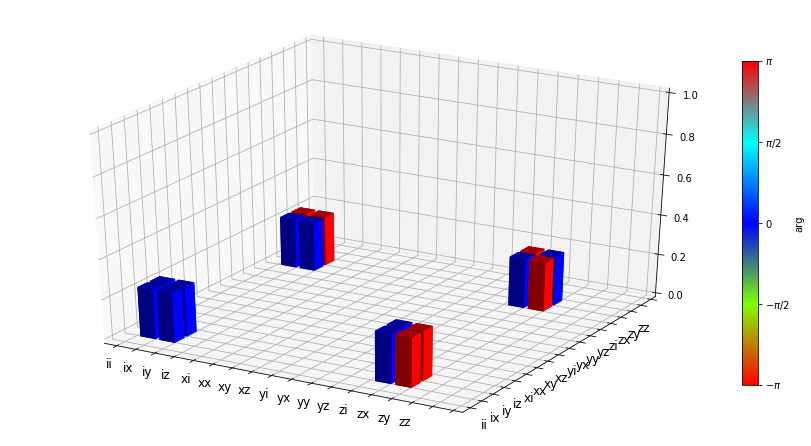

In [23]:
fig = plt.figure(figsize=(12,6))

U_f_s = to_super(result.U_f)

chi = qpt(U_f_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [24]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.14.3
SciPy,1.1.0
matplotlib,3.0.2
Cython,0.28.1
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.3.1
Python,"3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]"
OS,posix [darwin]
